![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_2/Session_2_Logistic_Regression_EXERCISE.ipynb)

**Resources:**
* Sklearn documentation

# Logistic Regression Assignment

We are given a dataset of  direct marketing campaigns of a credit institution. **Our goal is to implement a model to predict whether the client will subscribe to a term deposit.**

**When working on the assignment there could be multiple ways to explore data or implement specific analysis. Choose that one you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**


### Enjoy!

DATASET DESCRIPTION

- age (numeric)
- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('banking.csv')
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [3]:
data.shape

(41188, 21)

In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

## EDA and Feature Engineering 

An important requirement for Logistic Regression to function properly is Feature Engineering as it helps to identify independent variables. Without proper identification of independent variables Logistic Regression fails to perform correctly.

One disadvantage of logistic regression is that it doesn’t handle large number of categorical variables well.

```education``` column has many categories, try to reduce the categories for a better modelling. The education column has the following categories.


In [5]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all ```basic.XX``` in a unique value ```basic```

In [6]:
data["education"].replace(to_replace=["basic.4y", "basic.6y", "basic.9y"], value="basic.XX", inplace=True)

##### Analyse the distribution of the target variable

(array([36548.,  4640.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

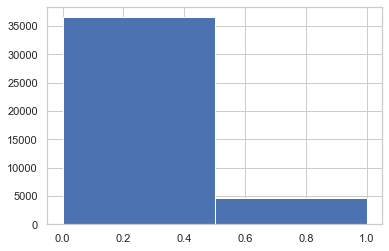

In [7]:
plt.hist(data.y, bins=2)

In [8]:
print(data.y.value_counts())
print(data.y.value_counts(normalize=True))

0    36548
1     4640
Name: y, dtype: int64
0    0.887346
1    0.112654
Name: y, dtype: float64


##### What can we observe about the distribution of the target variable

We can notice that the dataset is strongly unbalanced, in fact 89% of the observations of our dataset are clients that did not subscribe a term deposit, while just 11% of the observations of our dataset are clients that subscribed a term deposit.

##### Observe how the different numeric variables behave for the 2 classes

In [36]:
#General picture of the difference of behaviour of the numerical features for the two caregories

#Divide the dataset for the two values of y and get a description of the numerical features
data_subscribers= data[(data.y==0)]
print(data_subscribers.describe())

data_nosubscribers= data[(data.y==1)]
print(data_nosubscribers.describe())

                age      duration      campaign         pdays      previous  \
count  36548.000000  36548.000000  36548.000000  36548.000000  36548.000000   
mean      39.911185    220.844807      2.633085    984.113878      0.132374   
std        9.898132    207.096293      2.873438    120.656868      0.409199   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000     95.000000      1.000000    999.000000      0.000000   
50%       38.000000    163.500000      2.000000    999.000000      0.000000   
75%       47.000000    279.000000      3.000000    999.000000      0.000000   
max       95.000000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  36548.000000    36548.000000   36548.000000  36548.000000   
mean       0.248875       93.603757     -40.593097      3.811491   
std        1.482932        0.558993       4.391155      1.638187   
min       -3.400

In [35]:
#Focusing on the difference of the means of the numerical features
print(data_subscribers.mean(axis=0), data_nosubscribers.mean(axis=0))

sub_means=data_subscribers.mean(axis=0)
nosub_means=data_nosubscribers.mean(axis=0)

age                 39.911185
duration           220.844807
campaign             2.633085
pdays              984.113878
previous             0.132374
emp_var_rate         0.248875
cons_price_idx      93.603757
cons_conf_idx      -40.593097
euribor3m            3.811491
nr_employed       5176.166600
y                    0.000000
dtype: float64 age                 40.913147
duration           553.191164
campaign             2.051724
pdays              792.035560
previous             0.492672
emp_var_rate        -1.233448
cons_price_idx      93.354386
cons_conf_idx      -39.789784
euribor3m            2.123135
nr_employed       5095.115991
y                    1.000000
dtype: float64


In [37]:
#Visualize side by side the means of the numerical features for y=0 and y=1
listmeans=[]
listkeys=sub_means.index
for i, j in zip(sub_means, nosub_means):
   listmeans.append(str(i) + " / " + str(j))
dict(zip(listkeys, listmeans))

{'age': '39.911185290576775 / 40.91314655172414',
 'duration': '220.84480682937507 / 553.1911637931034',
 'campaign': '2.6330852577432418 / 2.0517241379310347',
 'pdays': '984.1138776403634 / 792.0355603448276',
 'previous': '0.13237386450694977 / 0.49267241379310345',
 'emp_var_rate': '0.24887545146103954 / -1.2334482758620935',
 'cons_price_idx': '93.60375705921969 / 93.35438599138058',
 'cons_conf_idx': '-40.59309674947492 / -39.78978448275881',
 'euribor3m': '3.8114911623072922 / 2.1231351293103518',
 'nr_employed': '5176.1666000854475 / 5095.115991379377',
 'y': '0.0 / 1.0'}

In [41]:
print("""We can notice a big difference among the value of the means of the featues for the two categories in the variables:

1)Duration: last contact duration, in seconds (numeric)

2)Previous: number of contacts performed before this campaign and for this client (numeric)

3)emp_var_rate: employment variation rate

4)euribor3m: euribor 3 month rate""")

We can notice a big difference among the value of the means of the featues for the two categories in the variables:

1)Duration: last contact duration, in seconds (numeric)

2)Previous: number of contacts performed before this campaign and for this client (numeric)

3)emp_var_rate: employment variation rate

4)euribor3m: euribor 3 month rate


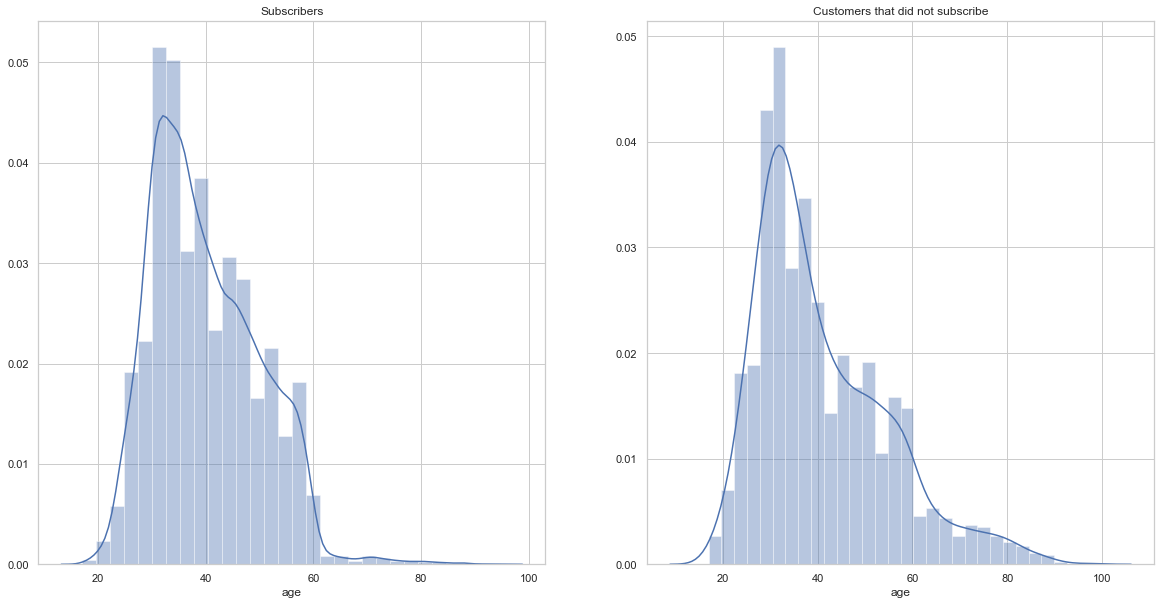

Even though the means for the variable age are pretty similar, from the distribution plots we can notice that people with an age above 60 tend to be more reluctant to subscribe


In [45]:
#Checking the difference in the distribution of the variable "age" accross the two cateogries of y
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(data_subscribers['age'], bins=30, ax=ax[0]);
ax[0].set_title('Subscribers')

sns.distplot(data_nosubscribers['age'], bins=30, ax=ax[1]);
ax[1].set_title('Customers that did not subscribe')

plt.show()

print("""Even though the means for the variable age are pretty similar, from the distribution plots we can notice that people with an age above 60 tend to be more reluctant to subscribe""")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


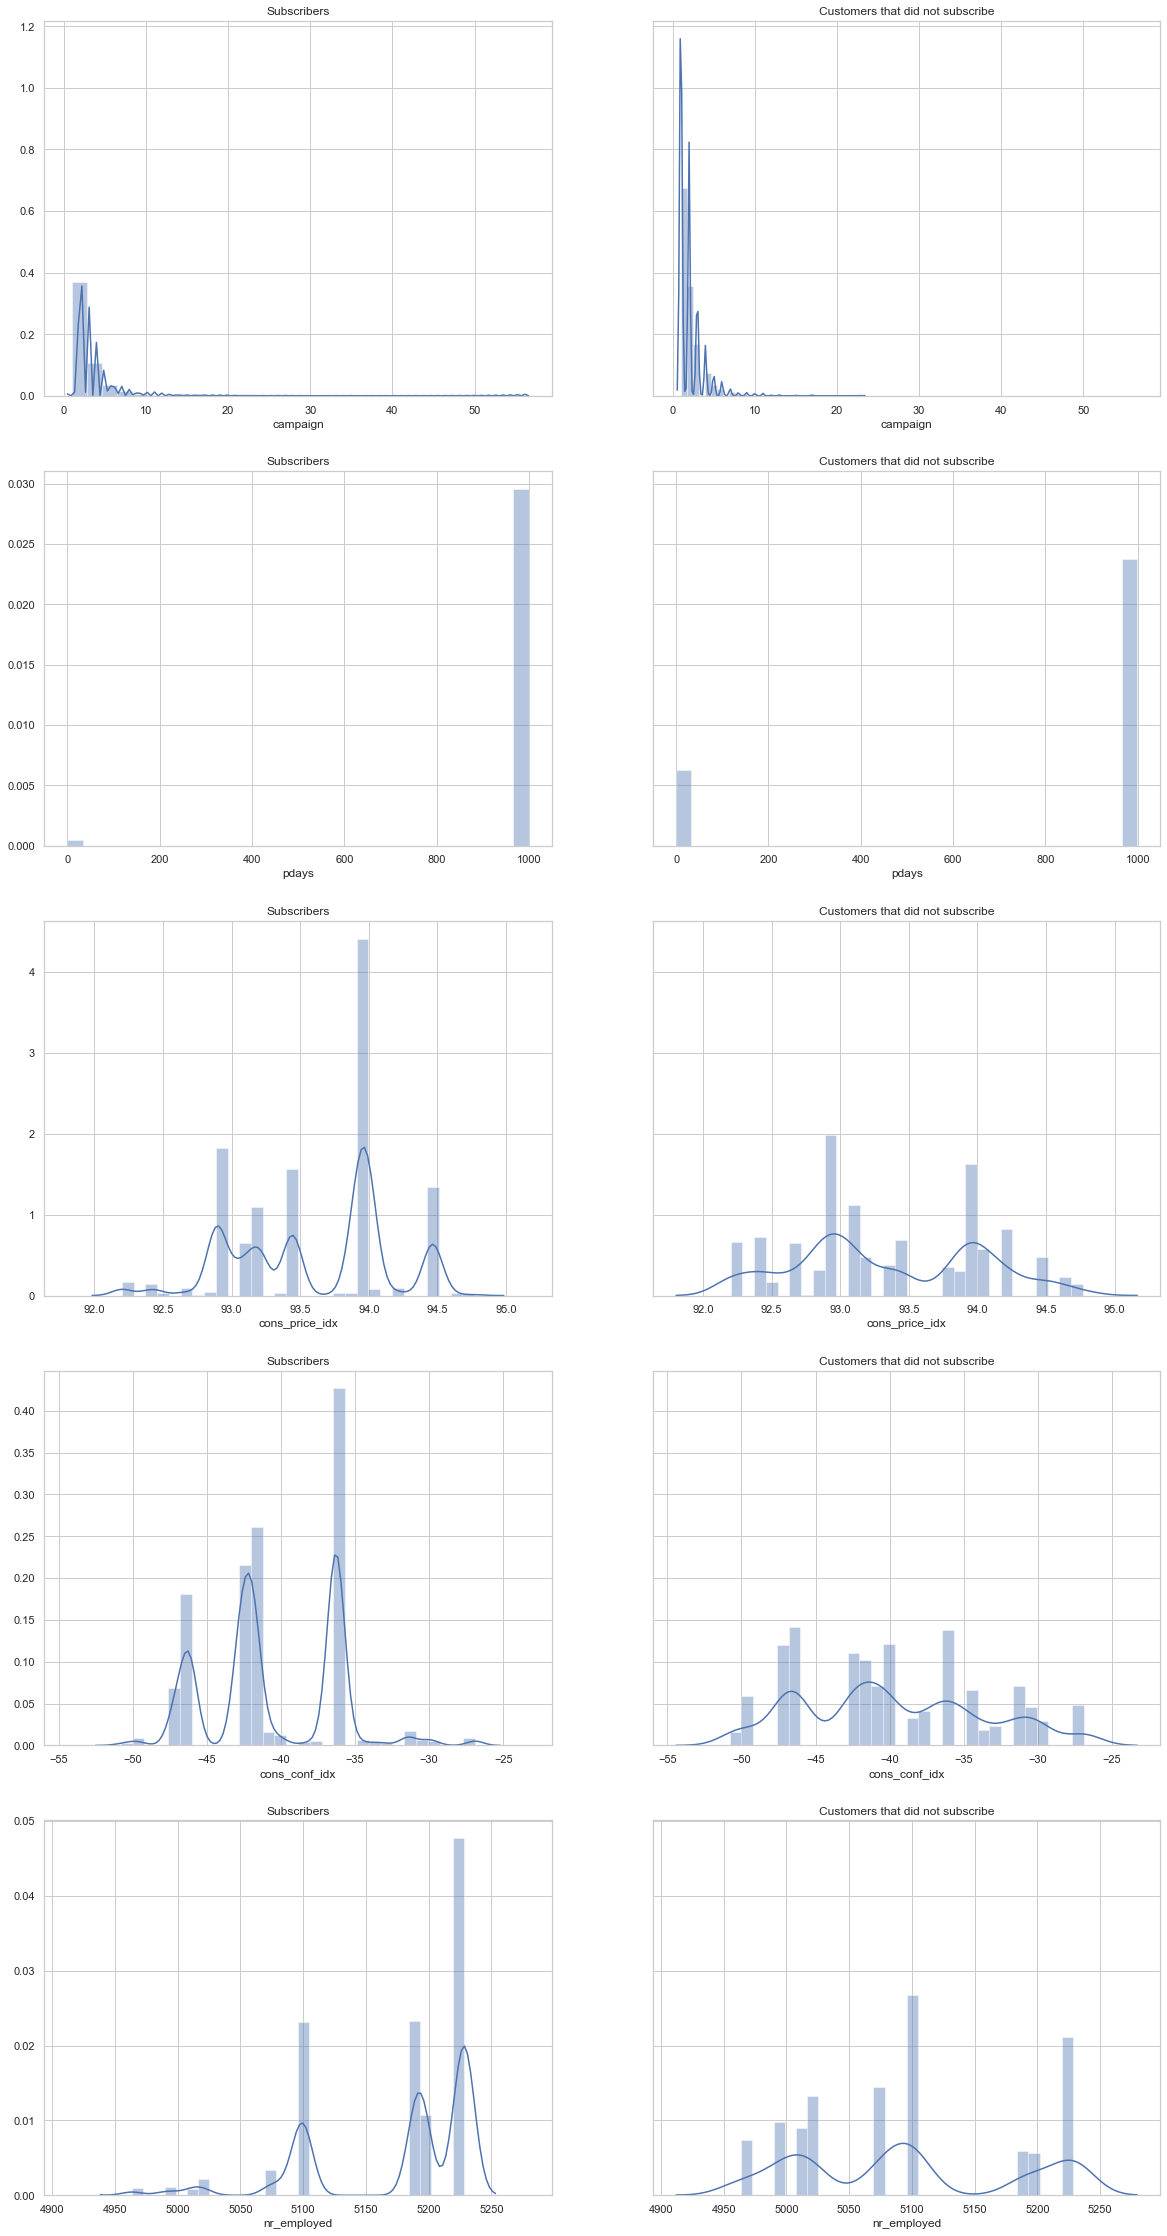

In [58]:
#Checking the difference in the distribution of the variables:"campaign", "pdays", "cons_price_idx", "cons_conf_idx" and 
#"nr_employed", accross the two cateogries of y

f,ax=plt.subplots(5,2,figsize=(20,40), sharex="row", sharey="row")

sns.distplot(data_subscribers['campaign'], bins=30, ax=ax[0,0]);
ax[0,0].set_title('Subscribers')

sns.distplot(data_nosubscribers['campaign'], bins=30, ax=ax[0,1]);
ax[0,1].set_title('Customers that did not subscribe')

sns.distplot(data_subscribers['pdays'], bins=30, ax=ax[1,0]);
ax[1,0].set_title('Subscribers')

sns.distplot(data_nosubscribers['pdays'], bins=30, ax=ax[1,1]);
ax[1,1].set_title('Customers that did not subscribe')

sns.distplot(data_subscribers['cons_price_idx'], bins=30, ax=ax[2,0]);
ax[2,0].set_title('Subscribers')

sns.distplot(data_nosubscribers['cons_price_idx'], bins=30, ax=ax[2,1]);
ax[2,1].set_title('Customers that did not subscribe')

sns.distplot(data_subscribers['cons_conf_idx'], bins=30, ax=ax[3,0]);
ax[3,0].set_title('Subscribers')

sns.distplot(data_nosubscribers['cons_conf_idx'], bins=30, ax=ax[3,1]);
ax[3,1].set_title('Customers that did not subscribe')

sns.distplot(data_subscribers['nr_employed'], bins=30, ax=ax[4,0]);
ax[4,0].set_title('Subscribers')

sns.distplot(data_nosubscribers['nr_employed'], bins=30, ax=ax[4,1]);
ax[4,1].set_title('Customers that did not subscribe')

plt.show()

Observations:
- The mean of duration for the subscribers is less than the half of the mean of the duration for the customers who did not subscribe, but as it is written in the description of the dataset, this variable should be removed from the features before fitting the dataset into our model, because the way in which it is built would create a bias in our results
- In addition to the difference of means in the variable duration, we can notice a big difference among the value of the means of the features for the two categories in the variables: previous(number of contacts performed before this campaign and for this client), emp_var_rate(employment variation rate), euribor3m(euribor 3 month rate)
- Even though the means for the variable "age" are pretty similar, from the distribution plots we can notice that people with an age above 60 tend to be more reluctant to subscribe

##### Analyse other variables - Make some plots and discuss them

- **Job title**

               subscribers  customers who did not subscribe
admin.            0.248167                         0.291379
blue-collar       0.235745                         0.137500
technician        0.164523                         0.157328
services          0.099759                         0.069612
management        0.071030                         0.070690
entrepreneur      0.036445                         0.026724
retired           0.035187                         0.093534
self-employed     0.034804                         0.032112
housemaid         0.026103                         0.022845
unemployed        0.023804                         0.031034
student           0.016417                         0.059267
unknown           0.008017                         0.007974


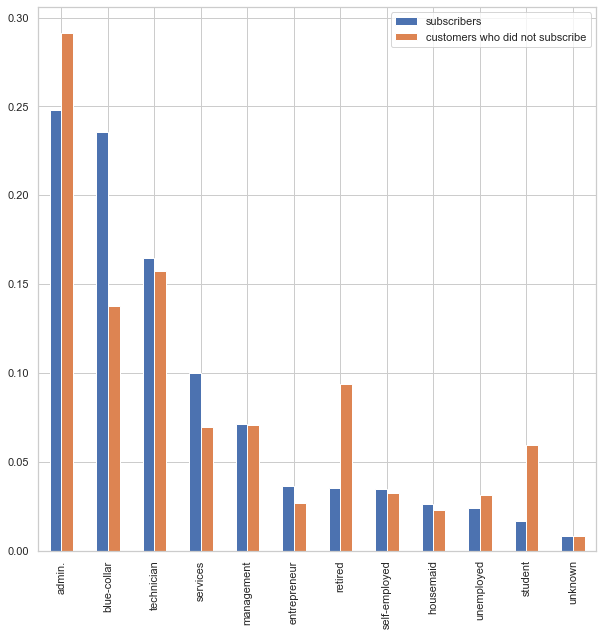

In [118]:
#Percentage of each kind of worker that subscribed and percentage of each kind of worker that didn t subscribed

subscribers_job= data_subscribers.job.value_counts(normalize=True)
nosubscribers_job= data_nosubscribers.job.value_counts(normalize=True)

jobs_percentages= pd.concat([subscribers_job, nosubscribers_job], axis=1)
jobs_percentages.columns= ["subscribers" , "customers who did not subscribe"]
print(jobs_percentages)

#Visualization 

jobs_percentages[["subscribers" , "customers who did not subscribe"]].plot(figsize=(10,10), kind='bar')

plt.show()

- Comment the plots

Among the people who subscribed, compared to the non-subscribers, we can notice a higher percentage of blu-collars(24% vs 14%) and people in the services(10% vs 7%).

While among the people who did not subscribe, compared to the subscribers, we can notice a higher percentage of administrators(29% vs 25%), retireds (9% vs 4%) and students(6% vs 2%).

- **Marital status**

          subscribers  customers who did not subscribe
married      0.612783                         0.545690
single       0.272190                         0.349138
divorced     0.113166                         0.102586
unknown      0.001861                         0.002586


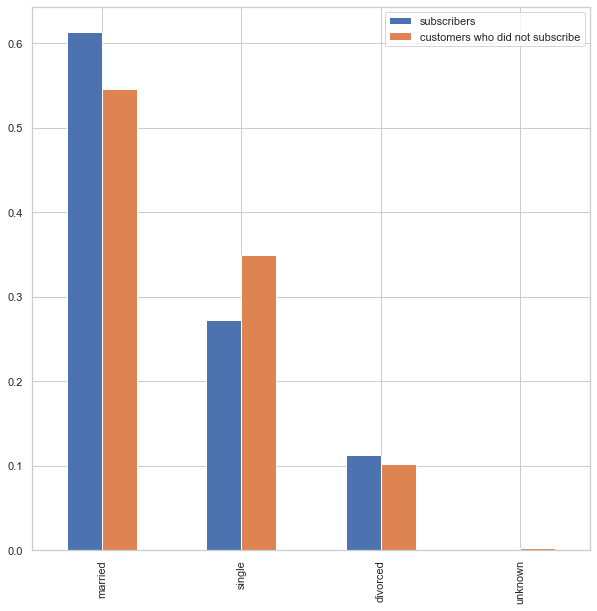

In [119]:
#Percentage of people with each kind of marital status that subscribed and percentage of people with each kind of marital status
#that didn t subscribed

subscribers_ms= data_subscribers.marital.value_counts(normalize=True)
nosubscribers_ms= data_nosubscribers.marital.value_counts(normalize=True)

ms_percentages= pd.concat([subscribers_ms, nosubscribers_ms], axis=1)
ms_percentages.columns= ["subscribers" , "customers who did not subscribe"]
print(ms_percentages)

#Visualization 

ms_percentages[["subscribers" , "customers who did not subscribe"]].plot(figsize=(10,10), kind='bar')

plt.show()

- Comment the plots

Among the people who subscribed, compared to the non-subscribers, we can notice a higher percentage of married people(61% vs 55%) and divorced (11% vs 10%).

While among the people who did not subscribe, compared to the subscribers, we can notice a higher percentage of singles(35% vs 27%).

- **Education**

                     subscribers  customers who did not subscribe
basic.XX                0.312575                         0.234698
university.degree       0.287239                         0.359914
high.school             0.232133                         0.222198
professional.course     0.127175                         0.128233
unknown                 0.040495                         0.054095
illiterate              0.000383                         0.000862


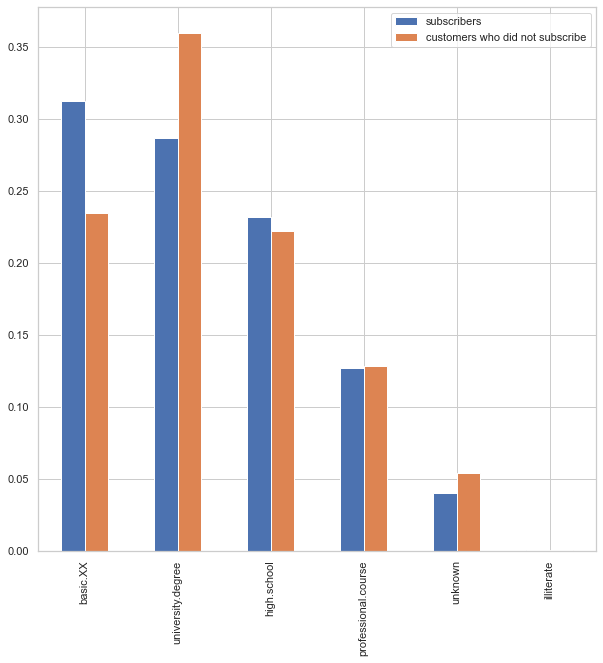

In [120]:
#Percentage of people for each level of education that subscribed and percentage of people for each level of education that
#didn t subscribed

subscribers_education= data_subscribers.education.value_counts(normalize=True)
nosubscribers_education= data_nosubscribers.education.value_counts(normalize=True)

education_percentages= pd.concat([subscribers_education, nosubscribers_education], axis=1)
education_percentages.columns= ["subscribers" , "customers who did not subscribe"]
print(education_percentages)

#Visualization 

education_percentages[["subscribers" , "customers who did not subscribe"]].plot(figsize=(10,10), kind='bar')

plt.show()

- Comment the plots

Among the people who subscribed, compared to the non-subscribers, we can notice a higher percentage of people with a basic education(31% vs 23%).

While among the people who did not subscribe, compared to the subscribers, we can notice a higher percentage of people with a university degree(36% vs 29%).

- **Day of Week**

     subscribers  customers who did not subscribe
mon     0.209779                         0.182543
thu     0.207344                         0.225216
wed     0.196591                         0.204526
tue     0.195277                         0.205388
fri     0.191009                         0.182328


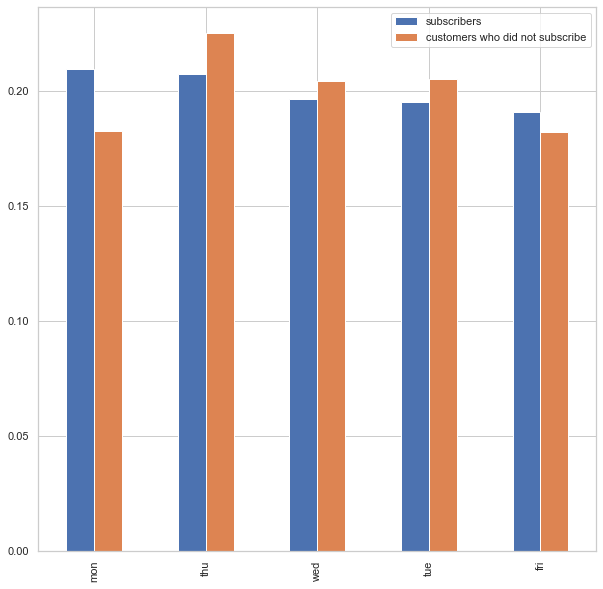

In [121]:
#Percentage of people that subscribed for each day of the week in which there had been the last contact and percentage of people
#that didn t subscribed for each day of the week in which there had been the last contact

subscribers_day_of_week= data_subscribers.day_of_week.value_counts(normalize=True)
nosubscribers_day_of_week= data_nosubscribers.day_of_week.value_counts(normalize=True)

day_of_week_percentages= pd.concat([subscribers_day_of_week, nosubscribers_day_of_week], axis=1)
day_of_week_percentages.columns= ["subscribers" , "customers who did not subscribe"]
print(day_of_week_percentages)

#Visualization 

day_of_week_percentages[["subscribers" , "customers who did not subscribe"]].plot(figsize=(10,10), kind='bar')

plt.show()

- Comment the plots

This feature seems to be useless for our model

- **Month**

     subscribers  customers who did not subscribe
may     0.352495                         0.190948
jul     0.178532                         0.139871
aug     0.151116                         0.141164
jun     0.130212                         0.120474
nov     0.100826                         0.089655
apr     0.057267                         0.116164
oct     0.011027                         0.067888
sep     0.008591                         0.055172
mar     0.007388                         0.059483
dec     0.002545                         0.019181


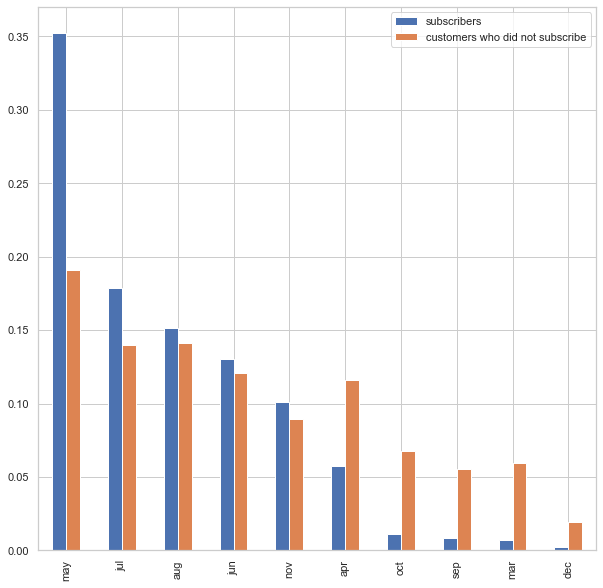

In [122]:
#Percentage of people that subscribed for each month of the year in which there had been the last contact and percentage of
#people that didn t subscribe for each month of the year in which there had been the last contact

subscribers_month= data_subscribers.month.value_counts(normalize=True)
nosubscribers_month= data_nosubscribers.month.value_counts(normalize=True)

month_percentages= pd.concat([subscribers_month, nosubscribers_month], axis=1)
month_percentages.columns= ["subscribers" , "customers who did not subscribe"]
print(month_percentages)

#Visualization 

month_percentages[["subscribers" , "customers who did not subscribe"]].plot(figsize=(10,10), kind='bar')

plt.show()

- Comment the plots

Among the people who subscribed, compared to the non-subscribers, we can notice a higher percentage of people that had been contacted last time in May(35% vs 19%).

While among the people who did not subscribe, compared to the subscribers, we can notice a higher percentage of people that had been contacted last time in April(12% vs 6%), October(7% vs 1%), September(6% vs 1%), March(6% vs 1%) and December(2% vs 0.2%).

- **poutcome**

             subscribers  customers who did not subscribe
nonexistent     0.887107                         0.676940
failure         0.099787                         0.130388
success         0.013106                         0.192672


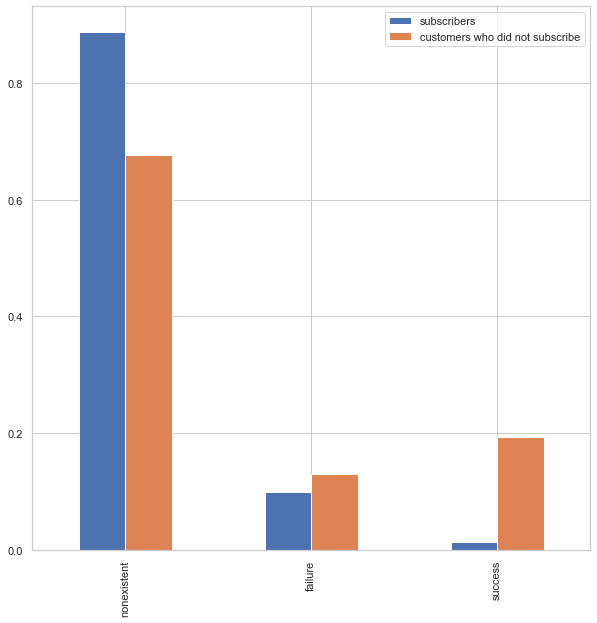

In [126]:
#Percentage of people for each outcome of the last marketing campaign who subscribed and percentage of people for each outcome
#of the last marketing campaign who didn t subscribe

subscribers_poutcome= data_subscribers.poutcome.value_counts(normalize=True)
nosubscribers_poutcome= data_nosubscribers.poutcome.value_counts(normalize=True)

poutcome_percentage= pd.concat([subscribers_poutcome, nosubscribers_poutcome], axis=1)
poutcome_percentage.columns= ["subscribers" , "customers who did not subscribe"]
print(poutcome_percentage)

#Visualization 

poutcome_percentage[["subscribers" , "customers who did not subscribe"]].plot(figsize=(10,10), kind='bar')

plt.show()

- Comment the plots

Among the people who subscribed, compared to the non-subscribers, we can notice a higher percentage of people that hadn't been contacted in the last marketing campaign(89% vs 68%).

While among the people who did not subscribe, compared to the subscribers, we can notice a higher percentage of people with whom the last marketing campaign was a success(19% vs 12%).

### Create dummy variables

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [128]:
# Dropping the columns I believe useles

data.drop(["duration",'day_of_week'],axis=1,inplace=True)

#Creating dummies for categorical variables

data = pd.get_dummies(data, columns=['job','marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'],drop_first=True)
data.head(3)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,0,0,0,0,0,1,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0,0,0,0,0,1,0,0,1,0
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,...,0,0,1,0,0,0,0,0,0,1


### Implement the Logistic Regression Model

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##### Prepare the dataset for training

In [132]:
#Selecting features and target variable
X =  data.drop(["y"], axis=1)
y = data["y"]

# Split training and test - test size: 30% random state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create an instance of the model 
model= LogisticRegression()

#Fit the model
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Compute predictions and accuracy using the accuracy score provided by the sklearn library

In [136]:
y_pred = model.predict(X_test)

import sklearn.metrics

print('Accuracy of logistic regression classifier on test set:', metrics.accuracy_score(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.9019179412478757


##### An accuracy of **91%** looks quite a good result, but have a look more in detail observing the confusion matrix and other metrics you consider interesting.


##### EXPLAIN WHY ACCURACY IS NOT ENOUGH TO EVALUATE THE PERFORMANCE OF A CLASSIFIER AND WHY IT MIGHT FAIL IN CASE OF IMBALANCED DATASET


The Accuracy score, that quantifies the percentage of predictions that are correct for all the classes, is not enough to evaluate the performance of a classifier because there may be cases in which we will be more interested in a metric that quantifies:

1)The number of positive class predictions that actually belong to the positive class (Precision). Precision, therefore, calculates the accuracy for the minority class.

2)The number of positive class predictions made out of all positive examples in the dataset (Recall). Unlike precision that only comments on the correct positive predictions out of all positive predictions, recall provides an indication of missed positive predictions.

A case in which the Accuracy is not a good metric to evaluate a model is the case of an imbalanced dataset as we have here. The reason why it is not a good metric is that quantifying the percentage of predictions that are correct for all the classes, if the negative class covers 90% of the observations and the positive class just 10% of the observations, and our model predicts correctly 100% of the observations of the positive class and 0% of the observations of the negative class we would have an accuracy of 90% percent but our model is working terribly.

The confusion matrics gives an interesting overview of how well a model is doing and it is a great starting point for any classification model evaluation.

![](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg?w=748)

Confusion matrix:
[[10871   110]
 [ 1102   274]]


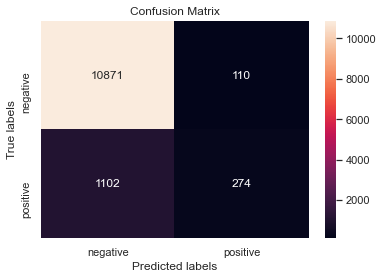

In [140]:
#Compute the confusion matrix

confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % confusionmatrix)

#Heatmap for the confusion matrix

ax= plt.subplot()
sns.heatmap(confusionmatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

**Is our model obtaining good results or is it failing in some specific case?**

Our model is failing in predicting observations of the positive class, in fact we have 1376 positive labeled observations but just 274 of them have been predicted correctly.

##### Compute other metrics using classification report

In [141]:
print("Classification report for logistic regression classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, y_pred)))


Classification report for logistic regression classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.71      0.20      0.31      1376

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.63     12357
weighted avg       0.89      0.90      0.88     12357




#### Remember:
    
**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?

$\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.

$\frac{TP}{TP+FN}$                                            

In [146]:
print(10871/(10871+1102)) #Precision@0
print(274/(274+110)) #Precision@1

0.9079595757120187
0.7135416666666666


In [147]:
print(10871/(10871+110)) #Recall@0
print(274/(274+1102)) #Recall@1

0.9899826973863947
0.19912790697674418


## Imbalanced Classes

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.


##### Explain why imbalanced data can be a problem 

Imbalanced data are a problem with classification models because the model is trained on a massive amount of data labeled for a class and on few data labeled with the other class, so the model will tend to be good in recognizing just one class and will also tend to classify everything with the majority label.


In [148]:
print("""We can see the results of the imbalanced dataset in the very low value of precision and recall for the observation labeled with 1""")

We can see the results of the imbalanced dataset in the very low value of precision and recall for the observation labeled with 1


##### SMOTE

During the exploratory data analysis we have seen that we have **Imbalanced Classes**, i.e.,the percentage of negative examples is much higher with respect to the percentage of positiv examples. Indeed, observing the confusion matrix we saw that the implmented model face some problem in predict the positive examples (if a client will subscribe a term deposit).


To face this problem we will apply an over-sampling technique trying to balance our dataset generating **Synthetic Samples:** it consists in creating new synthetic points from the minority class to increase its cardinality.

we will use the **SMOTE** Algorithm [see here for more details](https://arxiv.org/pdf/1106.1813.pdf).

In order to apply SMOTE **install the imblearn python library** (if you already have it you do not need to reinstall):

[Follow this instructions](https://imbalanced-learn.readthedocs.io/en/stable/install.html)


### Now implent again the model following all the steps

Prepare the data

In [149]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']

##### Apply SMOTE to generate synthetic data

In [152]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# Create training and test set - test size:30% random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

columns = X_train.columns

# Apply oversampling ONLY ON training data


os_data_X,os_data_y= os.fit_sample(X_train, y_train)

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


**Notice that we over-sampled only on the training data**

##### Check if the classes in the dataset now are balanced

In [153]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


They are prefectly distributed!!

##### Implement the model

In [154]:
# Prepare thedata qith the oversampled dataset
X = os_data_X
y = os_data_y

# Create training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create an instance of the logistic regression model
logreg = LogisticRegression()

#Fit the model
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Model Evaluation: evaluate the model and compare with previous implmentation/evaluation

In [155]:
#Compute predictions
y_pred = logreg.predict(X_test)

# score returns the mean accuracy on the given test data and labels.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


The total accuracy decreases. Is our model obtaining poorer results? Have a deeper look analysing confusion matrix and classification report

Confusion matrix:
[[6322 1344]
 [1918 5757]]


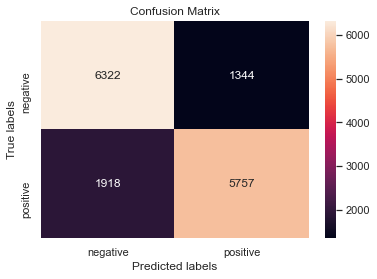

In [156]:
# Confusion Matrix
#Compute the confusion matrix

confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % confusionmatrix)

#Heatmap for the confusion matrix

ax= plt.subplot()
sns.heatmap(confusionmatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

Analysing the confusion matriix we can observe that now our model is able to predict quite weel both positive and negative examples!! Let's see if this is also confirmed looking at precision and recall

In [157]:
#classification_report

print("Classification report for logistic regression classifier %s:\n%s\n"
      % (logreg, metrics.classification_report(y_test, y_pred)))

Classification report for logistic regression classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      7666
           1       0.81      0.75      0.78      7675

    accuracy                           0.79     15341
   macro avg       0.79      0.79      0.79     15341
weighted avg       0.79      0.79      0.79     15341




The support is the number of occurrences of each class in y_test.



##### Discuss the obtained results!

Applying the SMOTE technique to oversample my data in order to balance my dataset improved the performance of my model. Even though the accuracy dropped down from 91% to 79%, now the model is performing much better, in fact the recall and the precision for the class 1 improved respectively from 20% to 75% and from 71% to 81%.